# ETUDE DYNAMYQUE DES METROS DE PARIS

## Introduction

Nous allons faire une étude sur le nombre de personne qui attentte a chaque métros.

parametre

* nb : nb de personne
* ar : % de personne qui arrive 
* so : % de perssonne qui sort de la gare
* ta : temps d'arriver du metro
* cm : capacité du metro



parramettre plus tard
* temps pour une perssonne a rentré / sortir

### Les importation

In [22]:
%matplotlib inline

from pylab import *

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [23]:
#ligne;nom;niem_arret;
ar = 0
so = 0
ta = 2
cm = 0.5
    

# initialisation
on va commencer par deux gare relier entre elles.  
hypothèse :  
 * deplacement wagon instantané

In [24]:
N = 100

class Station:
    def __init__(self, ar, so, ta, cm):
        self.ar = ar # % d'arrivant dans la gare
        self.so = so # % de partant dans la gare
        self.ta = ta # temps entre chaque metro
        self.cm = cm # capacité d'un metro
        self.nb = N # nombre de personne dans le metro
        self.t = 0   # initialisatien du temps de la gare
        self.next_s = []
    
    
    def update(self): # fonction qui actualise les donnés
        if self.so >= np.random.choice(100):
            n = np.random.choice(10)
            if self.nb - n >= 0:
                self.nb = self.nb - n
            else:
                self.nb = 0
        if self.ar >= np.random.choice(100):
            self.nb += np.random.choice(10)
        self.t += 1
        if self.t >= self.ta: #si metro est arrive
            if self.nb >= self.cm: #si plus de monde que de place
                #regarde si voy est arriver si cest pas le cas tu rajoute dans next
                self.nb = self.nb - self.cm
            else: #plus de place
                self.nb = 0
            self.t=0
                
    
    def next_station(self, station):
        self.next_s.append(station)

In [25]:
nb_step = 600

cm = 700

ar1 = 30
so1 = 5
ta1 = 10*60 + 0 #min * 60 + sec

ar2 = 30
so2 = 5
ta2 = 10*60 + 0 #min * 60 + sec

## une simulation

In [38]:
TIME_CAPT = 2

def simulation(L):
    time = [] # liste qui represente le temps 
    nb_tot = []
    nb_station = []
    for t in range(nb_step):
        for j in L:
            j.update()
        if t % TIME_CAPT == 0:
            nb = 0
            time.append(t)
            k = 0
            for j in L:
                if k >= len(nb_station):
                    nb_station.append([])
                nb_station[k].append(j.nb)
                nb += j.nb
                k+=1
            nb_tot.append(nb)
    return (time, nb_tot, nb_station)


    
    

In [27]:
def init(List):
    List = []
    List.append(Station(ar1, so1, ta1, cm))
    List.append(Station(ar2, so2, ta2, cm))
    List[0].next_station(List_Gare[1])
    List[1].next_station(List_Gare[0])
    return List

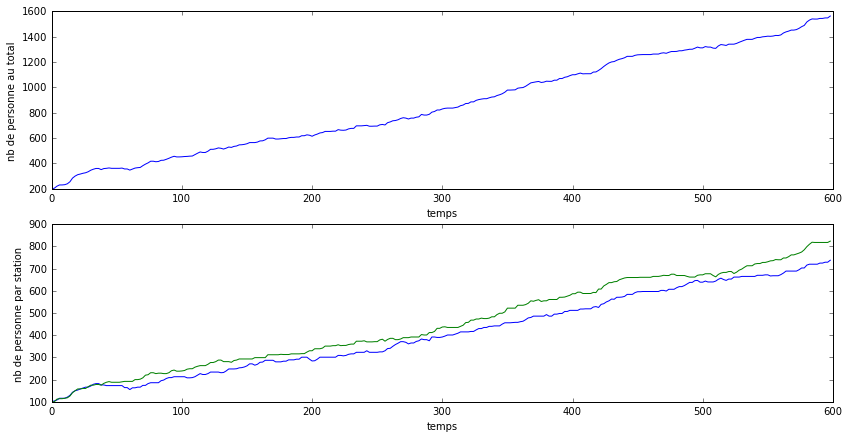

In [28]:
List_Gare = []
List_Gare.append(Station(ar1, so1, ta1, cm))
List_Gare.append(Station(ar2, so2, ta2, cm))
List_Gare[0].next_station(List_Gare[1])
List_Gare[1].next_station(List_Gare[0])



time, nb_tot, nb_station = simulation(List_Gare)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
axes[0].plot(time, nb_tot, 'b')
axes[0].set_xlabel("temps")
axes[0].set_ylabel("nb de personne au total")
for i in nb_station:
    axes[1].plot(time, i)
axes[1].set_xlabel("temps")
axes[1].set_ylabel("nb de personne par station")


## moyenner

300 300 300


ValueError: operands could not be broadcast together with shapes (300,) (2,) 

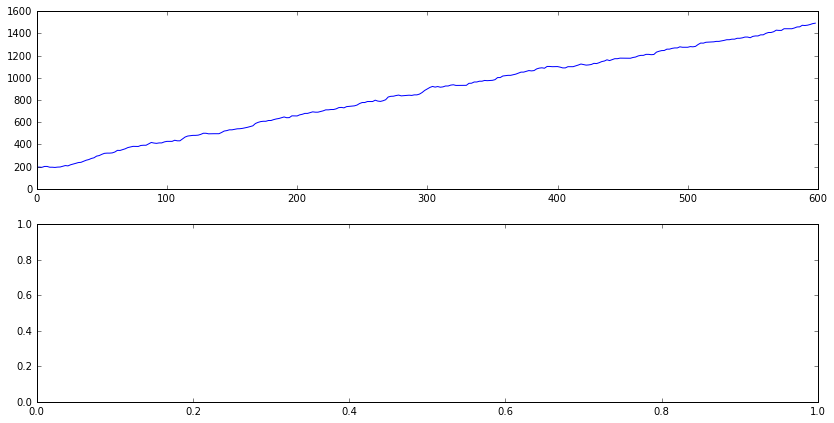

In [49]:
time, nb_tot_moy, nb_station_moy = simulation(List_Gare)

repet = 100

L=[]
L.append(nb_tot_moy.copy())
#initialisation 
for j in range(len(nb_tot_moy)):
    nb_tot_moy[j] = nb_tot_moy[j] / repet

for j in range(len(nb_station)):
    for k in range(len(nb_station[j])):
        nb_station[j][k] = nb_station[j][k] / repet

#recuperation des autre simulation
for i in range(repet - 1):
    #remise a 0
    List_Gare = []
    List_Gare.append(Station(ar1, so1, ta1, cm))
    List_Gare.append(Station(ar2, so2, ta2, cm))
    List_Gare[0].next_station(List_Gare[1])
    List_Gare[1].next_station(List_Gare[0])
    time, nb_tot, nb_station =simulation(List_Gare)
    L.append(nb_tot.copy())
    for j in range(len(nb_tot)):
        nb_tot_moy[j] += nb_tot[j] / repet
    for j in range(len(nb_station)):
        for k in range(len(nb_station[j])):
            nb_station[j][k] += nb_station[j][k] / repet

            
L_err = []
x=0
for k in range(len(L[0])):
    for i in range(len(L[0])):
        for j in range(len(L)-1):
            if L[j][k]>L[j+1][k]:
                x=L[j][k]
                L[j][k]=L[j+1][k]
                L[j+1][k]=x
    L_err.append((L[round(repet*0.975)][k], L[round(repet*0.025)][k]))

print(len(time), len(nb_tot), len(L_err))
    
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14,7))
axes[0].plot(time, nb_tot)#, time, L_err, 'g')
axes[0].errorbar(time, nb_tot, yerr=)#L_err)
axes[0].set_xlabel("temps")
axes[0].set_ylabel("nb de personne au total")
for i in nb_station:
    axes[1].plot(time, i)
axes[1].set_xlabel("temps")
axes[1].set_ylabel("nb de personne par station")